## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

#### Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv("dataset\kaggle_diabetes.csv")

<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\RAZER BLADE\AppData\Local\Temp\ipykernel_19760\3176666877.py:1: SyntaxWarning: invalid escape sequence '\k'
  data = pd.read_csv("dataset\kaggle_diabetes.csv")


In [20]:
data = data.drop_duplicates()
data.shape

(744, 9)

In [3]:
X = data.drop(['Outcome'], axis=1)
Y = data['Outcome']

## Impute to deal with Unbalenced Data

## Splitting data into train and test

In [4]:
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=8)
print('Trainning Shape', X_train.shape, Y_train.shape)
print('Trainning Shape', X_test.shape, Y_test.shape)

Trainning Shape (1600, 8) (1600,)
Trainning Shape (400, 8) (400,)


# Data transformation : Scaling and encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

def data_transformation(X_fit, X_tf):

    # Splitting Data into numerical and categorical
    cat_features = list(X_fit.select_dtypes(include="object").columns)
    num_features = list(X_fit.select_dtypes(exclude="object").columns)
    #print(num_features)
    #print(cat_features)

    # Creating the transformers
    cat_transformer = OneHotEncoder()
    num_transformer = StandardScaler()

    # Creating the preprocessor
    preprocessor = ColumnTransformer(
        [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)

    ]
    )

    X_p = preprocessor.fit(X_fit).transform(X_tf)
    X_p = pd.DataFrame(X_p, columns = X.columns)

    return X_p  

In [6]:
X_train_tf = data_transformation(X_train, X_train)
X_test_tf = data_transformation(X_train, X_test)

#### Create an Evaluate Function to give all metrics after model Training

In [32]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)




def evaluate_model(Y_test, Y_pred):

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    #classification_reportt = classification_report(Y_test, Y_pred)
    
    
    
    
    
    
    
    
    return accuracy, precision, recall, f1

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

models = {'RandomForest': RandomForestClassifier(),
                  'AdaBoost' : AdaBoostClassifier(),
                  'SVM': SVC(),
                  'KNN': KNeighborsClassifier()
                 }


def trainning_models(models, X_train, Y_train, X_test, Y_test):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, Y_train) # Train model

        # Make predictions
        Y_pred = model.predict(X_test)
        
        # Evaluate Train and Test dataset
        accuracy, precision, recall, f1 = evaluate_model(model, X_train, Y_train, Y_test, Y_pred)
        print(model)
        print("Accuracy: {0}".format(accuracy))
        print("Precision: {0}".format(precision))
        print("Recall: {0}".format(recall))
        print("f1: {0}".format(f1))
        
        # Confusion Matrix
        cm = confusion_matrix(Y_test, Y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(Y_test.unique()), yticklabels=list(Y_test.unique()))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top
        plt.gca().xaxis.tick_top()                # Move x-axis ticks to the top
        plt.show()

        print('='*35)
        print('\n')

In [9]:
def Learning_curve(models, X_train, Y_train):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                                cv=5, scoring='f1',
                                                train_sizes=np.linspace(0.1, 1, 10))
        #Learning Curve
        #Learning Curve
        plt.figure()
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
        plt.show()

RandomForestClassifier()
Accuracy: 0.99
Precision: 0.9712230215827338
Recall: 1.0
f1: 0.9854014598540146


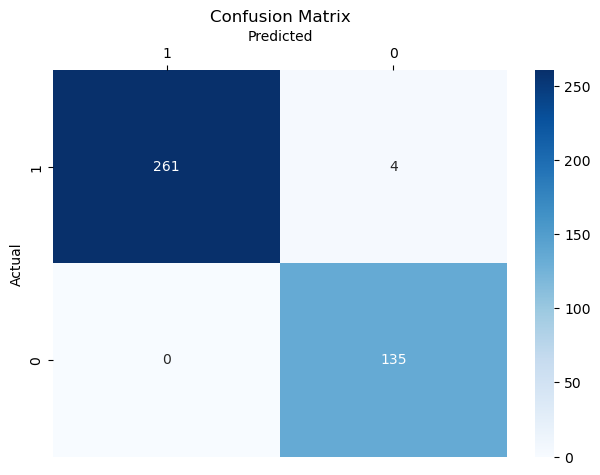

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
Accuracy: 0.845
Precision: 0.7664233576642335
Recall: 0.7777777777777778
f1: 0.7720588235294118


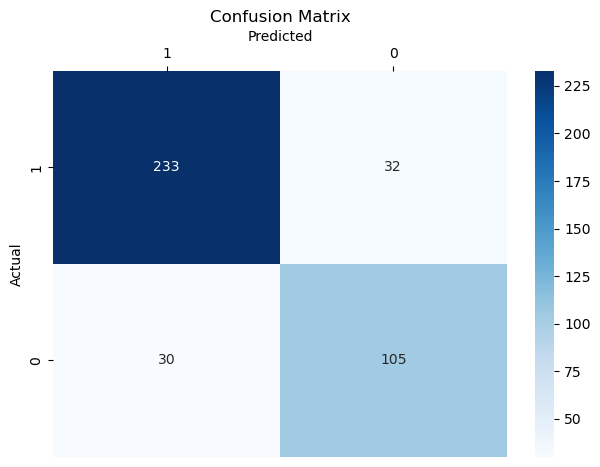



SVC()
Accuracy: 0.8575
Precision: 0.8305084745762712
Recall: 0.725925925925926
f1: 0.7747035573122529


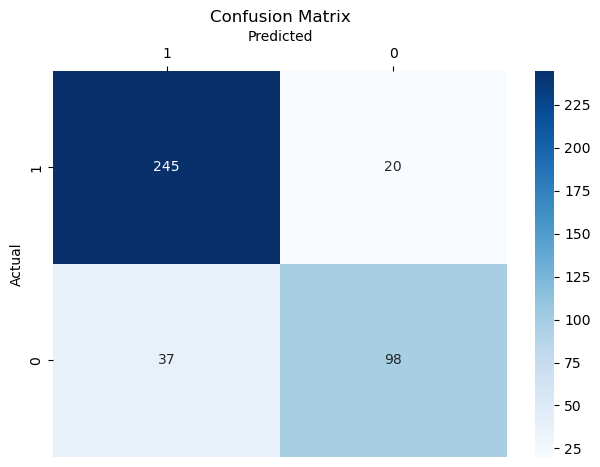



KNeighborsClassifier()
Accuracy: 0.8025
Precision: 0.7333333333333333
Recall: 0.6518518518518519
f1: 0.6901960784313725


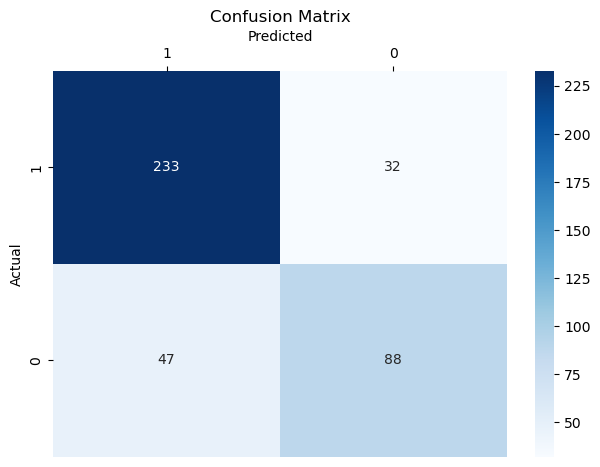

In [10]:
trainning_models(models, X_train_tf, Y_train.to_numpy(), X_test_tf, Y_test)

## Manual Feature Selection

In [20]:
def data_transformations(X_fit):

    # Splitting Data into numerical and categorical
    cat_features = list(X_fit.select_dtypes(include="object").columns)
    num_features = list(X_fit.select_dtypes(exclude="object").columns)
    #print(num_features)
    #print(cat_features)

    # Creating the transformers
    cat_transformer = OneHotEncoder()
    num_transformer = StandardScaler()

    # Creating the preprocessor
    preprocessor = ColumnTransformer(
        [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)

    ]
    )

    return preprocessor  

#### For n_estimators

In [21]:
#RF model comparaison

#here we will loop through and see which value of n_estimators is the best 
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200],
    'max_depth': [10, 15, 20]}

for n in param_grid['n_estimators']:
    rforest = make_pipeline(data_transformations(X_train), RandomForestClassifier(n_estimators=n))
    rforest_recall = cross_val_score(rforest, X_train_tf, Y_train.values.ravel(), cv=4, scoring ='recall')
    print('n_estimators ='+(str(n)) + (': ') + str(rforest_recall.mean()))


n_estimators =10: 0.8470326880355443
n_estimators =20: 0.8579815931450334
n_estimators =30: 0.8853009626573576
n_estimators =50: 0.8761768750661165
n_estimators =100: 0.8853009626573576
n_estimators =200: 0.8853009626573574


#### n_estimators = 50 Seems to be sufficient and good.

### For Max depths

In [24]:
#RF model comparaison

#here we will loop through and see which value of max_depth is the best 
param_grid = {
    'n_estimators': [20, 30 , 50, 100, 200],
    'max_depth': [10, 20, 15, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


for n in param_grid['max_depth']:
    rforest = make_pipeline(data_transformations(X_train), RandomForestClassifier(max_depth=n))
    rforest_recall = cross_val_score(rforest, X_train_tf, Y_train.values.ravel(), cv=4, scoring ='recall')
    print('max_depth ='+(str(n)) + (': ') + str(rforest_recall.mean()))


max_depth =10: 0.870742092457421
max_depth =20: 0.8779620226383159
max_depth =15: 0.8871257801756056
max_depth =25: 0.8780016925843648
max_depth =30: 0.8853009626573576


#### max_depth =15: Seems to be sufficient and gives good result.

# Grid Search Feature Selection

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,              
    verbose=2,
    n_jobs=-1           # Use all available processors
)

# Fit the grid search
grid_search.fit(X_train_tf, Y_train.values.ravel())

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1125 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
621 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-pack

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### Saving the best parameters 

In [30]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

#### Saving the best model 

In [27]:
final_model = grid_search.best_estimator_


#### Cheking the best model 

In [28]:
final_model.fit(X_train_tf, Y_train.values.ravel())


RandomForestClassifier(max_depth=30, n_estimators=200)

In [36]:
Y_pred = final_model.predict(X_test_tf)
accuracy, precision, recall, f1 = evaluate_model(Y_test, Y_pred)
print(recall)
print(accuracy)
print(f1)
print(precision)

1.0
0.985
0.9782608695652174
0.9574468085106383
